In [1]:
import matplotlib.pyplot as plt
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func, desc
import pandas as pd
import numpy as np
import csv
import seaborn as sns
from datetime import datetime as dt, timedelta


In [2]:
engine = create_engine("sqlite:///hawaii.sqlite", echo = False)

In [3]:
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [4]:
Measurements = Base.classes.measurement 
Stations = Base.classes.station

In [5]:
session = Session(engine)

In [6]:
#finding the last date
session.query(Measurements.date).order_by(Measurements.date.desc()).first()

('2017-08-23')

In [7]:
latest_date = session.query(Measurements.date).order_by(Measurements.date.desc()).first()[0]
format_latest_date = dt.strptime(latest_date,"%Y-%m-%d")
format_latest_date 

datetime.datetime(2017, 8, 23, 0, 0)

In [8]:
#last 12 months
sel = [Measurements.date, Measurements.prcp]
initial_date = format_latest_date - timedelta(days=365) #start date from 08/23/17
prcp_data = session.query(*sel).\
    filter((Measurements.date >= initial_date)).all()
    
prcp_data[:12]

[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03)]

In [9]:
precipitation = pd.DataFrame(prcp_data, columns=['Precipitation Date', 'Precipitation'])
precipitation.set_index('Precipitation Date', inplace=True)

In [10]:
precipitation.head()

,Precipitation
Precipitation Date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01


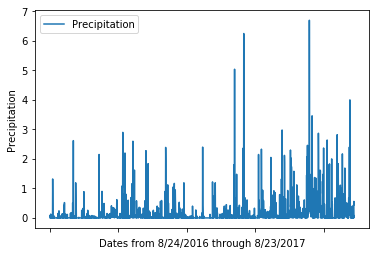

In [11]:
precipitation.plot()
plt.xlabel("Dates from 8/24/2016 through 8/23/2017")
plt.ylabel("Precipitation")
plt.show()

In [12]:
stations = session.query(Stations.name, Stations.station).all()
stations

[('WAIKIKI 717.2, HI US', 'USC00519397'),
 ('KANEOHE 838.1, HI US', 'USC00513117'),
 ('KUALOA RANCH HEADQUARTERS 886.9, HI US', 'USC00514830'),
 ('PEARL CITY, HI US', 'USC00517948'),
 ('UPPER WAHIAWA 874.3, HI US', 'USC00518838'),
 ('WAIMANALO EXPERIMENTAL FARM, HI US', 'USC00519523'),
 ('WAIHEE 837.5, HI US', 'USC00519281'),
 ('HONOLULU OBSERVATORY 702.2, HI US', 'USC00511918'),
 ('MANOA LYON ARBO 785.2, HI US', 'USC00516128')]

In [13]:
station_count = session.query(Stations.id).count()
print ("there are" + " " + str(station_count) + " " + "stations")

there are 9 stations


In [14]:
sel = [Measurements.station, func.count(Measurements.tobs)]
most_active = session.query(*sel).group_by(Measurements.station).order_by(desc(func.count(Measurements.tobs))).all()
most_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
print ("Most active station:" + str(most_active[0]))

Most active station:('USC00519281', 2772)


In [16]:
highest_station = most_active[0][0]
sel = [Measurements.tobs]
temperature_data = session.query(*sel).\
    filter(Measurements.date >= initial_date).\
    filter(Measurements.station == highest_station).all()

In [17]:
tobs_data = []
for row in temperature_data:
    tobs_data.append(row[0])

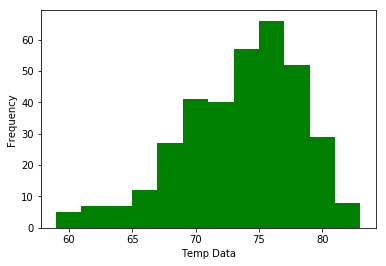

In [18]:
plt.hist(tobs_data, bins=12, label='tobs', color = 'green')
plt.xlabel("Temp Data")
plt.ylabel("Frequency")
plt.show()

In [26]:
start = input("Enter trip start yyyy-mm-dd:")
end = input ("Enter trip end yyyy-mm-dd:")

Enter trip start yyyy-mm-dd:2017-08-08 
Enter trip end yyyy-mm-dd:2017-08-24


In [27]:
output = calc_temp(start, end)
print ("the average,max and min temps for your dates are" + str(output))

ValueError: unconverted data remains:  

In [28]:
tavg = output[0]
tmin = output[1]
tmax = output[2]

NameError: name 'output' is not defined

In [29]:
plt.figure()
plt.bar(1,height=tavg, yerr=(tmax-tmin), width=0.0001, alpha=0.5)
plt.title("Avg Temperature")
plt.xticks([])
plt.ylim(0,100)
plt.ylabel("Temp in F")
plt.show()

NameError: name 'tavg' is not defined